<a href="https://colab.research.google.com/github/santiagonajera/SQL_Python_Bases/blob/main/SQL-pt3-16junio2026.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sqlite3

ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


In [2]:
# Paso 1: Importar bibliotecas
import pandas as pd
import sqlite3
from sqlalchemy import create_engine

In [3]:
# Paso 2: Descargar los archivos CSV desde GitHub
import requests

base_url = "https://raw.githubusercontent.com/santiagonajera/SQL_Python_Bases/main/Datos/"

csv_files = [
    "customers.csv",
    "employees.csv",
    "orders.csv",
    "productcategories.csv",
    "products.csv",
    "products_subcategories.csv",
    "vendor_products.csv",
    "vendors.csv"
]

for file in csv_files:
    url = base_url + file
    response = requests.get(url)
    with open(file, "wb") as f:
        f.write(response.content)
    print(f"Descargado: {file}")

Descargado: customers.csv
Descargado: employees.csv
Descargado: orders.csv
Descargado: productcategories.csv
Descargado: products.csv
Descargado: products_subcategories.csv
Descargado: vendor_products.csv
Descargado: vendors.csv


In [4]:
# Paso 3: Crear una base de datos SQLite en memoria
engine = create_engine('sqlite:///:memory:')
conn = engine.connect()

In [5]:
# Paso 3: Crear una base de datos SQLite en memoria
engine = create_engine('sqlite:///:memory:')
conn = engine.connect()

In [8]:
# Paso 5: Ejecutar una consulta de ejemplo
query = """
SELECT * FROM customers LIMIT 5;
"""

result = pd.read_sql_query(query, engine)
print("Primeros 5 clientes:")
display(result)

OperationalError: (sqlite3.OperationalError) no such table: customers
[SQL: 
SELECT * FROM customers LIMIT 5;
]
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [9]:
import os
print(os.listdir())

['.config', 'products.csv', 'employees.csv', 'customers.csv', 'orders.csv', 'productcategories.csv', 'products_subcategories.csv', 'vendor_products.csv', 'vendors.csv', 'sample_data']


In [10]:
import pandas as pd
import requests

base_url = "https://raw.githubusercontent.com/santiagonajera/SQL_Python_Bases/main/Datos/"

csv_files = [
    "customers.csv",
    "employees.csv",
    "orders.csv",
    "productcategories.csv",
    "products.csv",
    "products_subcategories.csv",
    "vendor_products.csv",
    "vendors.csv"
]

for file in csv_files:
    url = base_url + file
    try:
        df = pd.read_csv(url)
        df.to_csv(file, index=False)
        print(f"✅ {file} - Descargado y guardado con éxito. Registros: {len(df)}")
    except Exception as e:
        print(f"❌ Error descargando {file}: {e}")

❌ Error descargando customers.csv: 'utf-8' codec can't decode byte 0xe7 in position 8900: invalid continuation byte
❌ Error descargando employees.csv: 'utf-8' codec can't decode byte 0xe9 in position 857: invalid continuation byte
✅ orders.csv - Descargado y guardado con éxito. Registros: 60919
✅ productcategories.csv - Descargado y guardado con éxito. Registros: 4
✅ products.csv - Descargado y guardado con éxito. Registros: 295
❌ Error descargando products_subcategories.csv: HTTP Error 404: Not Found
❌ Error descargando vendor_products.csv: HTTP Error 404: Not Found
✅ vendors.csv - Descargado y guardado con éxito. Registros: 104


In [11]:
import pandas as pd
import requests

base_url = "https://raw.githubusercontent.com/santiagonajera/SQL_Python_Bases/main/Datos/"

csv_files = [
    "customers.csv",
    "employees.csv",
    "orders.csv",
    "productcategories.csv",
    "products.csv",
    "products_subcategories.csv",
    "vendor_products.csv",
    "vendors.csv"
]

# Archivos que necesitan codificación especial
encoding_map = {
    "customers.csv": "latin1",
    "employees.csv": "latin1",
}

for file in csv_files:
    url = base_url + file
    try:
        # Si el archivo necesita codificación específica, la usamos
        codif = encoding_map.get(file, "utf-8")
        df = pd.read_csv(url, encoding=codif)
        df.to_csv(file, index=False)
        print(f"✅ {file} - Descargado y guardado con éxito. Registros: {len(df)}")
    except Exception as e:
        print(f"❌ Error descargando {file}: {e}")

✅ customers.csv - Descargado y guardado con éxito. Registros: 635
✅ employees.csv - Descargado y guardado con éxito. Registros: 17
✅ orders.csv - Descargado y guardado con éxito. Registros: 60919
✅ productcategories.csv - Descargado y guardado con éxito. Registros: 4
✅ products.csv - Descargado y guardado con éxito. Registros: 295
❌ Error descargando products_subcategories.csv: HTTP Error 404: Not Found
❌ Error descargando vendor_products.csv: HTTP Error 404: Not Found
✅ vendors.csv - Descargado y guardado con éxito. Registros: 104


In [12]:
from sqlalchemy import create_engine
import pandas as pd

# Crear una base de datos SQLite en memoria
engine = create_engine('sqlite:///:memory:')

# Lista de archivos CSV descargados correctamente
csv_files = [
    "customers.csv",
    "employees.csv",
    "orders.csv",
    "productcategories.csv",
    "products.csv",
    "vendors.csv"
]

# Cargar cada archivo como una tabla en la base de datos
for file in csv_files:
    table_name = file.split(".")[0]  # Nombre de la tabla será el nombre del archivo sin .csv
    try:
        df = pd.read_csv(file)
        df.to_sql(table_name, engine, if_exists='replace', index=False)
        print(f"✅ Tabla '{table_name}' creada con éxito. Columnas: {list(df.columns)}")
    except Exception as e:
        print(f"❌ Error al cargar '{table_name}': {e}")

✅ Tabla 'customers' creada con éxito. Columnas: ['CustomerID', 'FirstName', 'LastName', 'FullName']
✅ Tabla 'employees' creada con éxito. Columnas: ['EmployeeID', 'ManagerID', 'FirstName', 'LastName', 'FullName', 'JobTitle', 'OrganizationLevel', 'MaritalStatus', 'Gender', 'Territory', 'Country', 'Group']
✅ Tabla 'orders' creada con éxito. Columnas: ['SalesOrderID', 'SalesOrderDetailID', 'OrderDate', 'DueDate', 'ShipDate', 'EmployeeID', 'CustomerID', 'SubTotal', 'TaxAmt', 'Freight', 'TotalDue', 'ProductID', 'OrderQty', 'UnitPrice', 'UnitPriceDiscount', 'LineTotal']
✅ Tabla 'productcategories' creada con éxito. Columnas: ['CategoryID', 'CategoryName']
✅ Tabla 'products' creada con éxito. Columnas: ['ProductID', 'ProductNumber', 'ProductName', 'ModelName', 'MakeFlag', 'StandardCost', 'ListPrice', 'SubCategoryID']
✅ Tabla 'vendors' creada con éxito. Columnas: ['VendorID', 'VendorName', 'AccountNumber', 'CreditRating', 'ActiveFlag']


In [15]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, engine)
print("Tablas disponibles:")
display(tables)

Tablas disponibles:


,name
0,customers
1,employees
2,orders
3,productcategories
4,products
5,vendors


from matplotlib import pyplot as plt
import seaborn as sns
tables.groupby('name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
query = """
SELECT *
FROM employees LIMIT 2;
"""
result = pd.read_sql_query(query, engine)
display(result)

,EmployeeID,ManagerID,FirstName,LastName,FullName,JobTitle,OrganizationLevel,MaritalStatus,Gender,Territory,Country,Group
0,274,NaN,Stephen,Jiang,Stephen Jiang,North American Sales Manager,2,M,M,None,None,None
1,275,274.0,Michael,Blythe,Michael Blythe,Sales Representative,3,S,M,Northeast,US,North America


In [24]:
query = """
SELECT *
FROM orders LIMIT 8;
"""
result = pd.read_sql_query(query, engine)
display(result)

,SalesOrderID,SalesOrderDetailID,OrderDate,DueDate,ShipDate,EmployeeID,CustomerID,SubTotal,TaxAmt,Freight,TotalDue,ProductID,OrderQty,UnitPrice,UnitPriceDiscount,LineTotal
0,43659,1,5/31/2011,6/12/2011,6/7/2011,279,1045,20565.6206,1971.5149,616.0984,23153.2339,776,1,2024.9940,0.0,2024.9940
1,43659,2,5/31/2011,6/12/2011,6/7/2011,279,1045,20565.6206,1971.5149,616.0984,23153.2339,777,3,2024.9940,0.0,6074.9820
2,43659,3,5/31/2011,6/12/2011,6/7/2011,279,1045,20565.6206,1971.5149,616.0984,23153.2339,778,1,2024.9940,0.0,2024.9940
3,43659,4,5/31/2011,6/12/2011,6/7/2011,279,1045,20565.6206,1971.5149,616.0984,23153.2339,771,1,2039.9940,0.0,2039.9940
4,43659,5,5/31/2011,6/12/2011,6/7/2011,279,1045,20565.6206,1971.5149,616.0984,23153.2339,772,1,2039.9940,0.0,2039.9940
5,43659,6,5/31/2011,6/12/2011,6/7/2011,279,1045,20565.6206,1971.5149,616.0984,23153.2339,773,2,2039.9940,0.0,4079.9880
6,43659,7,5/31/2011,6/12/2011,6/7/2011,279,1045,20565.6206,1971.5149,616.0984,23153.2339,774,1,2039.9940,0.0,2039.9940
7,43659,8,5/31/2011,6/12/2011,6/7/2011,279,1045,20565.6206,1971.5149,616.0984,23153.2339,714,3,28.8404,0.0,86.5212


In [25]:
query = """
SELECT *
FROM orders
Group by EmployeeID;
"""
result = pd.read_sql_query(query, engine)
display(result)

,SalesOrderID,SalesOrderDetailID,OrderDate,DueDate,ShipDate,EmployeeID,CustomerID,SubTotal,TaxAmt,Freight,TotalDue,ProductID,OrderQty,UnitPrice,UnitPriceDiscount,LineTotal
0,43849,535,7/1/2011,7/13/2011,7/8/2011,274,1031,20544.7015,1969.9765,615.6177,23130.2957,776,2,2024.9940,0.0,4049.9880
1,43670,111,5/31/2011,6/12/2011,6/7/2011,275,487,6122.0820,587.5603,183.6126,6893.2549,710,1,5.7000,0.0,5.7000
2,43663,52,5/31/2011,6/12/2011,6/7/2011,276,483,419.4589,40.2681,12.5838,472.3108,760,1,419.4589,0.0,419.4589
3,43667,77,5/31/2011,6/12/2011,6/7/2011,277,1373,6107.0820,586.1203,183.1626,6876.3649,710,3,5.7000,0.0,17.1000
4,43677,155,5/31/2011,6/12/2011,6/7/2011,278,1043,7793.1108,747.1011,233.4691,8773.6810,715,3,28.8404,0.0,86.5212
5,43659,1,5/31/2011,6/12/2011,6/7/2011,279,1045,20565.6206,1971.5149,616.0984,23153.2339,776,1,2024.9940,0.0,2024.9940
6,43664,53,5/31/2011,6/12/2011,6/7/2011,280,1205,24432.6088,2344.9921,732.8100,27510.4109,772,1,2039.9940,0.0,2039.9940
7,43678,167,5/31/2011,6/12/2011,6/7/2011,281,1183,9799.9243,942.0740,294.3981,11036.3964,760,1,419.4589,0.0,419.4589
8,43661,15,5/31/2011,6/12/2011,6/7/2011,282,851,32726.4786,3153.7696,985.5530,36865.8012,745,1,809.7600,0.0,809.7600
9,43665,61,5/31/2011,6/12/2011,6/7/2011,283,517,14352.7713,1375.9427,429.9821,16158.6961,711,2,20.1865,0.0,40.3730


In [28]:
query = """
SELECT
e.EmployeeID,
e.FullName,
SUM(o.LineTotal) AS VentaTotal
FROM orders o
JOIN employees e ON o.EmployeeID = e.EmployeeID
GROUP BY e.EmployeeID
ORDER BY VentaTotal DESC;
"""
result = pd.read_sql_query(query, engine)
display(result)

,EmployeeID,FullName,VentaTotal
0,276,Linda Mitchell,1.036701e+07
1,277,Jillian Carson,1.006580e+07
2,275,Michael Blythe,9.293903e+06
3,289,Jae Pak,8.503339e+06
4,279,Tsvi Reiter,7.171013e+06
5,281,Shu Ito,6.427006e+06
6,282,José Saraiva,5.926418e+06
7,290,Ranjit Varkey Chudukatil,4.509889e+06
8,283,David Campbell,3.729945e+06
9,278,Garrett Vargas,3.609447e+06


<ipython-input-29-420635864>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


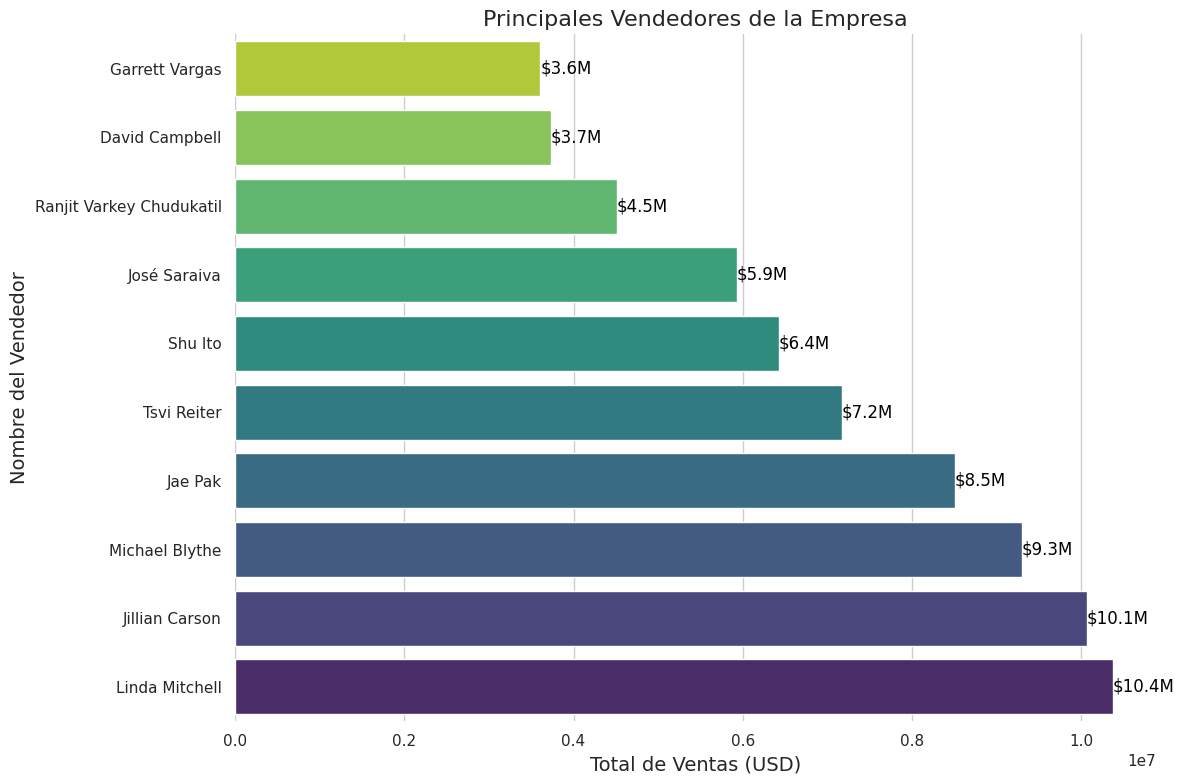

In [29]:
# 1. Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Ejecutar la consulta SQL para obtener los principales vendedores
query = """
SELECT
    e.EmployeeID,
    e.FullName,
    SUM(o.LineTotal) AS VentaTotal
FROM orders o
JOIN employees e ON o.EmployeeID = e.EmployeeID
GROUP BY e.EmployeeID, e.FullName
ORDER BY VentaTotal DESC
LIMIT 10;
"""

# Suponiendo que 'engine' es tu conexión a la base de datos SQLite
result = pd.read_sql_query(query, engine)

# 3. Configurar estilo de Seaborn y tamaño del gráfico
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# 4. Crear gráfico de barras horizontales
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    data=result,
    x='VentaTotal',
    y='FullName',
    palette='viridis',  # Paleta de colores elegante
    orient='h'
)

# 5. Personalizar gráfico
plt.title("Principales Vendedores de la Empresa", fontsize=16)
plt.xlabel("Total de Ventas (USD)", fontsize=14)
plt.ylabel("Nombre del Vendedor", fontsize=14)

# Invertir eje Y para mostrar al mejor vendedor arriba
plt.gca().invert_yaxis()

# Mostrar valores sobre las barras
for index, value in enumerate(result['VentaTotal']):
    plt.text(value, index, f"${value/1e6:.1f}M", va='center', ha='left', fontsize=12, color='black')

# Eliminar bordes innecesarios
sns.despine(left=True, bottom=True)

# Ajustar diseño y mostrar gráfico
plt.tight_layout()
plt.show()

In [30]:
# 1. Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation, PillowWriter

# 2. Ejecutar la consulta SQL para obtener los principales vendedores
query = """
SELECT
    e.EmployeeID,
    e.FullName,
    SUM(o.LineTotal) AS VentaTotal
FROM orders o
JOIN employees e ON o.EmployeeID = e.EmployeeID
GROUP BY e.EmployeeID, e.FullName
ORDER BY VentaTotal DESC
LIMIT 10;
"""

# Suponiendo que 'engine' es tu conexión a la base de datos SQLite
result = pd.read_sql_query(query, engine)

# 3. Configurar estilo de Seaborn y tamaño del gráfico
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# 4. Inicializar figura y eje
fig, ax = plt.subplots(figsize=(12, 8))
ax.invert_yaxis()  # Mostrar al mejor vendedor arriba

# 5. Función para actualizar el gráfico en cada cuadro de la animación
def update(frame):
    # Filtrar datos hasta el índice actual
    data = result.iloc[:frame + 1]

    # Limpiar el eje antes de dibujar
    ax.clear()

    # Crear el gráfico de barras
    sns.barplot(
        data=data,
        x='VentaTotal',
        y='FullName',
        palette='viridis',  # Paleta de colores elegante
        orient='h',
        ax=ax
    )

    # Personalizar gráfico
    ax.set_title("Principales Vendedores de la Empresa", fontsize=16)
    ax.set_xlabel("Total de Ventas (USD)", fontsize=14)
    ax.set_ylabel("Nombre del Vendedor", fontsize=14)

    # Mostrar valores sobre las barras
    for index, value in enumerate(data['VentaTotal']):
        ax.text(value, index, f"${value/1e6:.1f}M", va='center', ha='left', fontsize=12, color='black')

    # Eliminar bordes innecesarios
    sns.despine(left=True, bottom=True)

# 6. Crear la animación
ani = FuncAnimation(
    fig,
    update,
    frames=len(result),  # Número de cuadros igual al número de filas
    interval=500,  # Tiempo entre cuadros (en milisegundos)
    repeat=False  # No repetir la animación
)

# 7. Guardar la animación como GIF
writer = PillowWriter(fps=2)
ani.save('vendedores_animados.gif', writer=writer)

# 8. Mostrar el gráfico animado
plt.close(fig)  # Cerrar la figura antes de mostrar el GIF
from IPython.display import Image
Image(url='vendedores_animados.gif')

<ipython-input-30-4117519365>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-30-4117519365>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-30-4117519365>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-30-4117519365>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-30-4117519365>:41: FutureWarning: 

Passing `palette` wit

In [31]:
!pip install plotly pandas sqlalchemy

In [32]:
# 2. Importar bibliotecas
import pandas as pd
from sqlalchemy import create_engine
import plotly.express as px

# 3. Crear motor SQLite (suponiendo que ya cargaste los datos)
engine = create_engine('sqlite:///:memory:')  # Base de datos en memoria

# 4. Ejecutar consulta SQL para obtener los principales vendedores
query = """
SELECT
    e.EmployeeID,
    e.FullName,
    SUM(o.LineTotal) AS VentaTotal
FROM orders o
JOIN employees e ON o.EmployeeID = e.EmployeeID
GROUP BY e.EmployeeID, e.FullName
ORDER BY VentaTotal DESC
LIMIT 10;
"""

# Cargar resultados a un DataFrame
df_sellers = pd.read_sql_query(query, engine)

# 5. Crear gráfico interactivo con Plotly
fig = px.bar(
    df_sellers,
    x='VentaTotal',
    y='FullName',
    orientation='h',
    title='Principales Vendedores por Total de Ventas',
    labels={'VentaTotal': 'Total de Ventas (USD)', 'FullName': 'Nombre del Vendedor'},
    color='VentaTotal',
    color_continuous_scale=px.colors.sequential.Viridis
)

# Mejorar diseño del gráfico
fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    height=600,
    width=900,
    template='plotly_white',
    font=dict(family="Arial", size=12),
    title_x=0.5,
    showlegend=False
)

# Mostrar gráfico interactivo
fig.show()

OperationalError: (sqlite3.OperationalError) no such table: orders
[SQL: 
SELECT 
    e.EmployeeID,
    e.FullName,
    SUM(o.LineTotal) AS VentaTotal
FROM orders o
JOIN employees e ON o.EmployeeID = e.EmployeeID
GROUP BY e.EmployeeID, e.FullName
ORDER BY VentaTotal DESC
LIMIT 10;
]
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [33]:
# 1. Instalar dependencias necesarias (solo una vez)
!pip install pandas sqlalchemy plotly requests

# 2. Importar bibliotecas
import pandas as pd
import requests
from sqlalchemy import create_engine
import plotly.express as px

# 3. Definir URL base y lista de archivos
base_url = "https://raw.githubusercontent.com/santiagonajera/SQL_Python_Bases/main/Datos/"

csv_files = [
    "customers.csv",
    "employees.csv",
    "orders.csv",
    "productcategories.csv",
    "products.csv",
    "vendors.csv"
]

encoding_map = {
    "customers.csv": "latin1",
    "employees.csv": "latin1",
    "orders.csv": "latin1"
}

# 4. Descargar archivos CSV
for file in csv_files:
    url = base_url + file
    try:
        codif = encoding_map.get(file, "utf-8")
        df = pd.read_csv(url, encoding=codif)
        df.to_csv(file, index=False)
        print(f"✅ {file} - Descargado y guardado con éxito. Registros: {len(df)}")
    except Exception as e:
        print(f"❌ Error descargando {file}: {e}")

# 5. Crear conexión a base de datos SQLite en memoria
engine = create_engine('sqlite:///:memory:')

# 6. Cargar cada archivo CSV como tabla en la base de datos
for file in csv_files:
    table_name = file.split(".")[0]
    try:
        df = pd.read_csv(file)
        df.to_sql(table_name, engine, if_exists='replace', index=False)
        print(f"✅ Tabla '{table_name}' creada con éxito. Columnas: {list(df.columns)}")
    except Exception as e:
        print(f"❌ Error cargando '{table_name}': {e}")

# 7. Ejecutar consulta SQL para obtener los principales vendedores
query = """
SELECT
    e.EmployeeID,
    e.FullName,
    SUM(o.LineTotal) AS VentaTotal
FROM orders o
JOIN employees e ON o.EmployeeID = e.EmployeeID
GROUP BY e.EmployeeID, e.FullName
ORDER BY VentaTotal DESC
LIMIT 10;
"""

# Ejecutar consulta y mostrar resultados
df_sellers = pd.read_sql_query(query, engine)

print("\n📊 Principales vendedores:")
display(df_sellers)

# 8. Generar gráfico interactivo con Plotly
fig = px.bar(
    df_sellers,
    x='VentaTotal',
    y='FullName',
    orientation='h',
    title='Principales Vendedores por Total de Ventas',
    labels={'VentaTotal': 'Total de Ventas (USD)', 'FullName': 'Nombre del Vendedor'},
    color='VentaTotal',
    color_continuous_scale=px.colors.sequential.Viridis
)

# Mejorar diseño del gráfico
fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    height=600,
    width=900,
    template='plotly_white',
    font=dict(family="Arial", size=12),
    title_x=0.5,
    showlegend=False
)

# Mostrar gráfico interactivo
fig.show()

✅ customers.csv - Descargado y guardado con éxito. Registros: 635
✅ employees.csv - Descargado y guardado con éxito. Registros: 17
✅ orders.csv - Descargado y guardado con éxito. Registros: 60919
✅ productcategories.csv - Descargado y guardado con éxito. Registros: 4
✅ products.csv - Descargado y guardado con éxito. Registros: 295
✅ vendors.csv - Descargado y guardado con éxito. Registros: 104
✅ Tabla 'customers' creada con éxito. Columnas: ['CustomerID', 'FirstName', 'LastName', 'FullName']
✅ Tabla 'employees' creada con éxito. Columnas: ['EmployeeID', 'ManagerID', 'FirstName', 'LastName', 'FullName', 'JobTitle', 'OrganizationLevel', 'MaritalStatus', 'Gender', 'Territory', 'Country', 'Group']
✅ Tabla 'orders' creada con éxito. Columnas: ['SalesOrderID', 'SalesOrderDetailID', 'OrderDate', 'DueDate', 'ShipDate', 'EmployeeID', 'CustomerID', 'SubTotal', 'TaxAmt', 'Freight', 'TotalDue', 'ProductID', 'OrderQty', 'UnitPrice', 'UnitPriceDiscount', 'LineTotal']
✅ Tabla 'productcategories' crea

,EmployeeID,FullName,VentaTotal
0,276,Linda Mitchell,1.036701e+07
1,277,Jillian Carson,1.006580e+07
2,275,Michael Blythe,9.293903e+06
3,289,Jae Pak,8.503339e+06
4,279,Tsvi Reiter,7.171013e+06
5,281,Shu Ito,6.427006e+06
6,282,José Saraiva,5.926418e+06
7,290,Ranjit Varkey Chudukatil,4.509889e+06
8,283,David Campbell,3.729945e+06
9,278,Garrett Vargas,3.609447e+06


In [34]:
# 2. Importar bibliotecas
import pandas as pd
import requests
from sqlalchemy import create_engine
import plotly.express as px

# 3. Definir URL base y lista de archivos
base_url = "https://raw.githubusercontent.com/santiagonajera/SQL_Python_Bases/main/Datos/"

csv_files = [
    "customers.csv",
    "employees.csv",
    "orders.csv",
    "productcategories.csv",
    "products.csv",
    "vendors.csv"
]

encoding_map = {
    "customers.csv": "latin1",
    "employees.csv": "latin1",
    "orders.csv": "latin1"
}

# 4. Descargar archivos CSV
for file in csv_files:
    url = base_url + file
    try:
        codif = encoding_map.get(file, "utf-8")
        df = pd.read_csv(url, encoding=codif)
        df.to_csv(file, index=False)
        print(f"✅ {file} - Descargado y guardado con éxito. Registros: {len(df)}")
    except Exception as e:
        print(f"❌ Error descargando {file}: {e}")

# 5. Crear conexión a base de datos SQLite en memoria
engine = create_engine('sqlite:///:memory:')

# 6. Cargar cada archivo CSV como tabla en la base de datos
for file in csv_files:
    table_name = file.split(".")[0]
    try:
        df = pd.read_csv(file)
        df.to_sql(table_name, engine, if_exists='replace', index=False)
        print(f"✅ Tabla '{table_name}' creada con éxito. Columnas: {list(df.columns)}")
    except Exception as e:
        print(f"❌ Error cargando '{table_name}': {e}")

# 7. Ejecutar consulta SQL filtrada para obtener los principales vendedores (sin Jillian Carson)
query = """
SELECT
    e.EmployeeID,
    e.FullName,
    SUM(o.LineTotal) AS VentaTotal
FROM orders o
JOIN employees e ON o.EmployeeID = e.EmployeeID
WHERE e.FullName != 'Jillian Carson'  -- 👈 Filtro para excluir a Jillian Carson
GROUP BY e.EmployeeID, e.FullName
ORDER BY VentaTotal DESC
LIMIT 10;
"""

# Ejecutar consulta y mostrar resultados
df_sellers = pd.read_sql_query(query, engine)

print("\n📊 Principales vendedores (sin Jillian Carson):")
display(df_sellers)

# 8. Generar gráfico interactivo con Plotly
fig = px.bar(
    df_sellers,
    x='VentaTotal',
    y='FullName',
    orientation='h',
    title='Principales Vendedores por Total de Ventas',
    labels={'VentaTotal': 'Total de Ventas (USD)', 'FullName': 'Nombre del Vendedor'},
    color='VentaTotal',
    color_continuous_scale=px.colors.sequential.Viridis
)

# Mejorar diseño del gráfico
fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    height=600,
    width=900,
    template='plotly_white',
    font=dict(family="Arial", size=12),
    title_x=0.5,
    showlegend=False
)

# Mostrar gráfico interactivo
fig.show()

✅ customers.csv - Descargado y guardado con éxito. Registros: 635
✅ employees.csv - Descargado y guardado con éxito. Registros: 17
✅ orders.csv - Descargado y guardado con éxito. Registros: 60919
✅ productcategories.csv - Descargado y guardado con éxito. Registros: 4
✅ products.csv - Descargado y guardado con éxito. Registros: 295
✅ vendors.csv - Descargado y guardado con éxito. Registros: 104
✅ Tabla 'customers' creada con éxito. Columnas: ['CustomerID', 'FirstName', 'LastName', 'FullName']
✅ Tabla 'employees' creada con éxito. Columnas: ['EmployeeID', 'ManagerID', 'FirstName', 'LastName', 'FullName', 'JobTitle', 'OrganizationLevel', 'MaritalStatus', 'Gender', 'Territory', 'Country', 'Group']
✅ Tabla 'orders' creada con éxito. Columnas: ['SalesOrderID', 'SalesOrderDetailID', 'OrderDate', 'DueDate', 'ShipDate', 'EmployeeID', 'CustomerID', 'SubTotal', 'TaxAmt', 'Freight', 'TotalDue', 'ProductID', 'OrderQty', 'UnitPrice', 'UnitPriceDiscount', 'LineTotal']
✅ Tabla 'productcategories' crea

,EmployeeID,FullName,VentaTotal
0,276,Linda Mitchell,1.036701e+07
1,275,Michael Blythe,9.293903e+06
2,289,Jae Pak,8.503339e+06
3,279,Tsvi Reiter,7.171013e+06
4,281,Shu Ito,6.427006e+06
5,282,José Saraiva,5.926418e+06
6,290,Ranjit Varkey Chudukatil,4.509889e+06
7,283,David Campbell,3.729945e+06
8,278,Garrett Vargas,3.609447e+06
9,280,Pamela Ansman-Wolfe,3.325103e+06


In [35]:
# 1. Instalar dependencias necesarias (solo una vez)
!pip install pandas sqlalchemy plotly requests

# 2. Importar bibliotecas
import pandas as pd
import requests
from sqlalchemy import create_engine
import plotly.express as px

# 3. Definir URL base y lista de archivos
base_url = "https://raw.githubusercontent.com/santiagonajera/SQL_Python_Bases/main/Datos/"

csv_files = [
    "customers.csv",
    "employees.csv",
    "orders.csv",
    "productcategories.csv",
    "products.csv",
    "vendors.csv"
]

encoding_map = {
    "customers.csv": "latin1",
    "employees.csv": "latin1",
    "orders.csv": "latin1"
}

# 4. Descargar archivos CSV
for file in csv_files:
    url = base_url + file
    try:
        codif = encoding_map.get(file, "utf-8")
        df = pd.read_csv(url, encoding=codif)
        df.to_csv(file, index=False)
        print(f"✅ {file} - Descargado y guardado con éxito. Registros: {len(df)}")
    except Exception as e:
        print(f"❌ Error descargando {file}: {e}")

# 5. Crear conexión a base de datos SQLite en memoria
engine = create_engine('sqlite:///:memory:')

# 6. Cargar cada archivo CSV como tabla en la base de datos
for file in csv_files:
    table_name = file.split(".")[0]
    try:
        df = pd.read_csv(file)
        df.to_sql(table_name, engine, if_exists='replace', index=False)
        print(f"✅ Tabla '{table_name}' creada con éxito. Columnas: {list(df.columns)}")
    except Exception as e:
        print(f"❌ Error cargando '{table_name}': {e}")

# 7. Consulta SQL: Unir ventas de 'Jae Pak' y 'Tsvi Reiter' y renombrar como 'Juan'
query = """
SELECT
    CASE
        WHEN FullName IN ('Jae Pak', 'Tsvi Reiter') THEN 'Juan'
        ELSE FullName
    END AS NombreEmpleado,
    SUM(LineTotal) AS VentaTotal
FROM (
    SELECT
        e.FullName,
        o.LineTotal
    FROM orders o
    JOIN employees e ON o.EmployeeID = e.EmployeeID
    WHERE e.FullName != 'Jillian Carson'
)
GROUP BY NombreEmpleado
ORDER BY VentaTotal DESC
LIMIT 10;
"""

# Ejecutar consulta y mostrar resultados
df_sellers = pd.read_sql_query(query, engine)

print("\n📊 Principales vendedores (con Juan):")
display(df_sellers)

# 8. Generar gráfico interactivo con Plotly
fig = px.bar(
    df_sellers,
    x='VentaTotal',
    y='NombreEmpleado',
    orientation='h',
    title='Principales Vendedores por Total de Ventas',
    labels={'VentaTotal': 'Total de Ventas (USD)', 'NombreEmpleado': 'Nombre del Vendedor'},
    color='VentaTotal',
    color_continuous_scale=px.colors.sequential.Viridis
)

# Mejorar diseño del gráfico
fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    height=600,
    width=900,
    template='plotly_white',
    font=dict(family="Arial", size=12),
    title_x=0.5,
    showlegend=False
)

# Mostrar gráfico interactivo
fig.show()

✅ customers.csv - Descargado y guardado con éxito. Registros: 635
✅ employees.csv - Descargado y guardado con éxito. Registros: 17
✅ orders.csv - Descargado y guardado con éxito. Registros: 60919
✅ productcategories.csv - Descargado y guardado con éxito. Registros: 4
✅ products.csv - Descargado y guardado con éxito. Registros: 295
✅ vendors.csv - Descargado y guardado con éxito. Registros: 104
✅ Tabla 'customers' creada con éxito. Columnas: ['CustomerID', 'FirstName', 'LastName', 'FullName']
✅ Tabla 'employees' creada con éxito. Columnas: ['EmployeeID', 'ManagerID', 'FirstName', 'LastName', 'FullName', 'JobTitle', 'OrganizationLevel', 'MaritalStatus', 'Gender', 'Territory', 'Country', 'Group']
✅ Tabla 'orders' creada con éxito. Columnas: ['SalesOrderID', 'SalesOrderDetailID', 'OrderDate', 'DueDate', 'ShipDate', 'EmployeeID', 'CustomerID', 'SubTotal', 'TaxAmt', 'Freight', 'TotalDue', 'ProductID', 'OrderQty', 'UnitPrice', 'UnitPriceDiscount', 'LineTotal']
✅ Tabla 'productcategories' crea

,NombreEmpleado,VentaTotal
0,Juan,1.567435e+07
1,Linda Mitchell,1.036701e+07
2,Michael Blythe,9.293903e+06
3,Shu Ito,6.427006e+06
4,José Saraiva,5.926418e+06
5,Ranjit Varkey Chudukatil,4.509889e+06
6,David Campbell,3.729945e+06
7,Garrett Vargas,3.609447e+06
8,Pamela Ansman-Wolfe,3.325103e+06
9,Tete Mensa-Annan,2.312546e+06
